In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from IPython import display
from IPython.display import clear_output

import os
import glob
import imageio
import time
import IPython.display as ipd

import librosa
import librosa.display
import warnings

from matplotlib import image
from PIL import Image
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
# get list of genres
general_path = 'F:\Projects\SET 2 - Music\Data'
genres = list(os.listdir(f'{general_path}/genres_original/'))

In [5]:
# retrieve all the filenames
filenames = []
for gen in genres:
    for fname in list(os.listdir(f'{general_path}/genres_original/'+gen)):
        filenames.append(gen+'/'+fname)
len(filenames)

1000

In [6]:
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

Making directories to store our spectograms required for training CNN

In [7]:
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/blues"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/classical"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/country"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/disco"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/hiphop"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/jazz"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/metal"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/pop"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/reggae"
!mkdir "F:/Projects/SET 2 - Music/Data/spectogram/rock"


A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/blues already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/classical already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/country already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/disco already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/hiphop already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/jazz already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/metal already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/pop already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/reggae already exists.
A subdirectory or file F:/Projects/SET 2 - Music/Data/spectogram/rock already exists.


# Exploratory Data Analysis

In [8]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [9]:
y, sr = librosa.load(f'{general_path}/genres_original/pop/pop.00020.wav')

print(y.shape)
print(sr)

print("Len of Audio -> ", y.shape[0]/sr)

(661504,)
22050
Len of Audio ->  30.00018140589569


In [10]:
# trimming the zeros at the start and end of the audio file
audio_file, _ = librosa.effects.trim(y)

Shape of D object: (1025, 1293)


 ...]

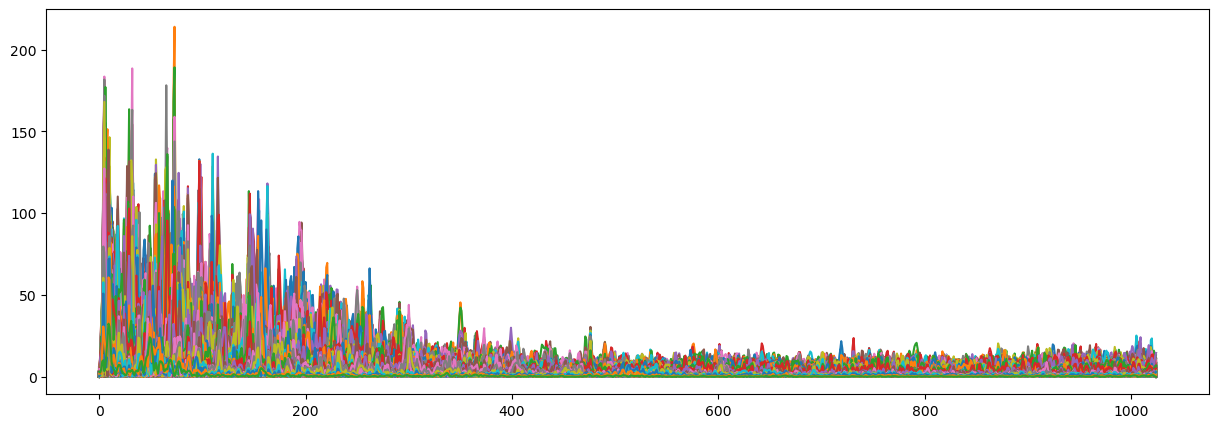

In [11]:
#  STFT represents a signal in the time-frequency domain 
#  by computing discrete Fourier transforms (DFT) over short overlapping windows.
D = np.abs(librosa.stft(audio_file))
print('Shape of D object:', np.shape(D))

plt.figure(figsize = (15, 5))
plt.plot(D)

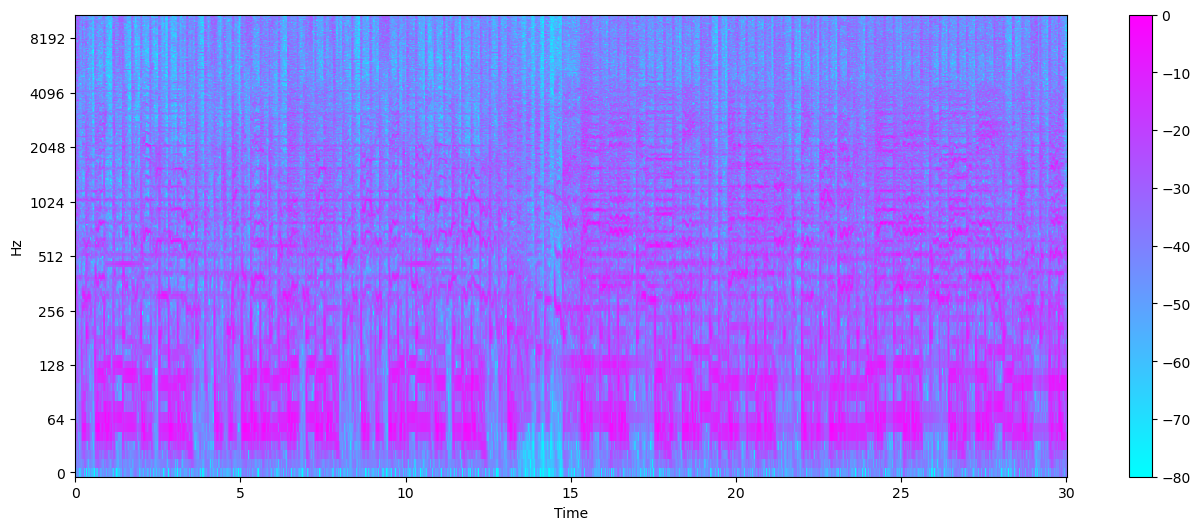

In [12]:
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()

Text(0.5, 1.0, 'Metal Mel Spectrogram')

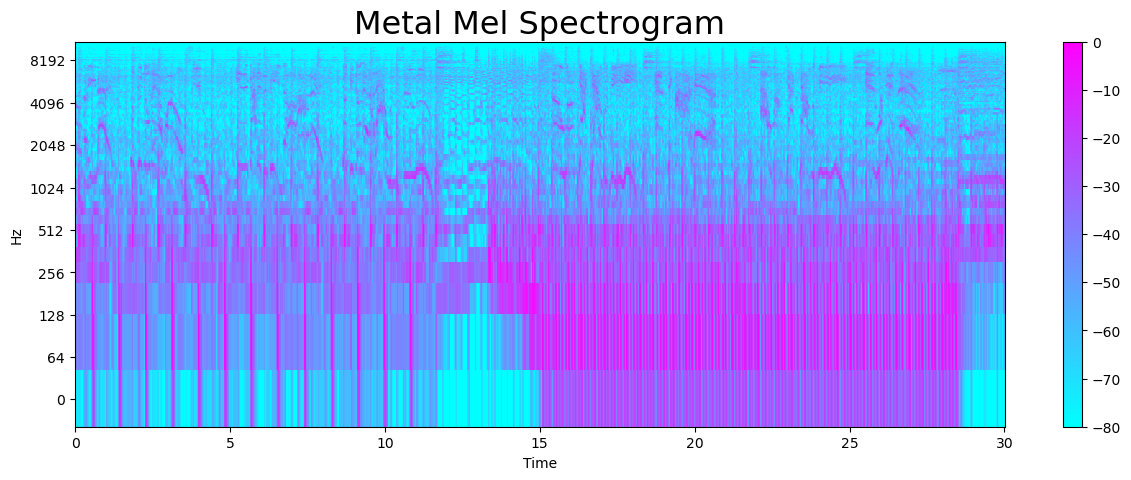

In [13]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

# Generating the mel-spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (15, 5))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23)

HPSS does Median-filtering harmonic percussive source separation.

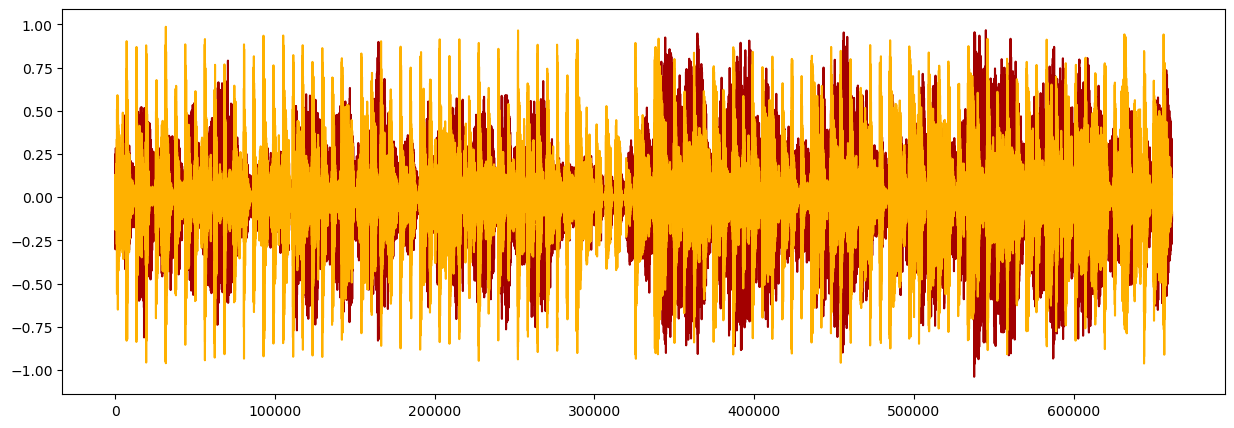

In [14]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (15, 5))
plt.plot(y_harm, color = '#A30000')
plt.plot(y_perc, color = '#FFB100')

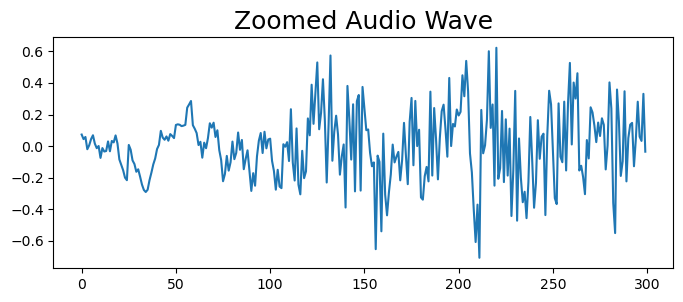

In [15]:
#Zoomed Audio Wave
start = 900
end = 1200
plt.figure(figsize=(8,3))
plt.plot(audio_file[start:end])
plt.title('Zoomed Audio Wave', fontsize = 18)
plt.show()

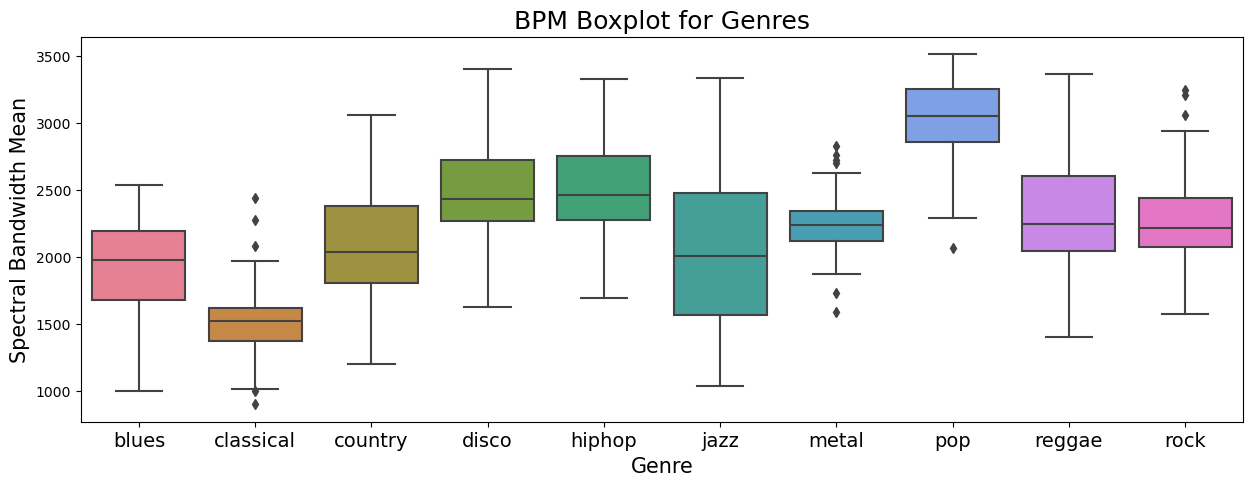

In [16]:
x = data[["label", "spectral_bandwidth_mean"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Spectral Bandwidth Mean", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

Plotting coorelatin matrx

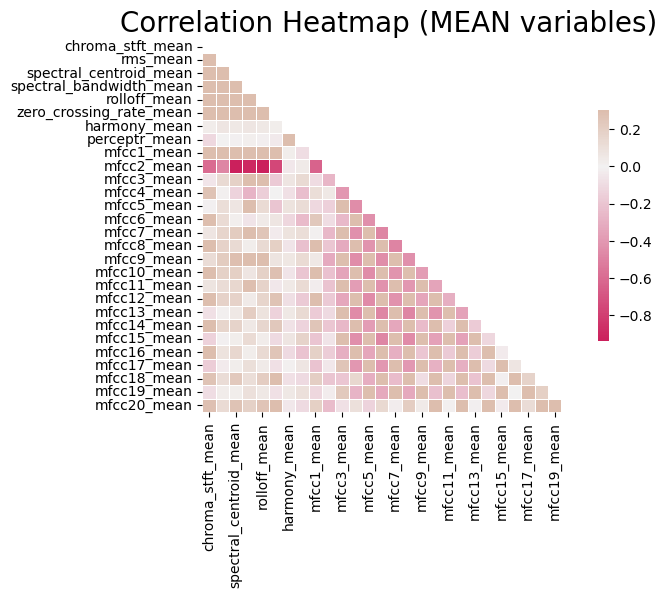

In [18]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

Centroids: [3005.02896501 3810.266901   5038.17782208 ... 3271.3062776  2554.68120433
 2120.41941975] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


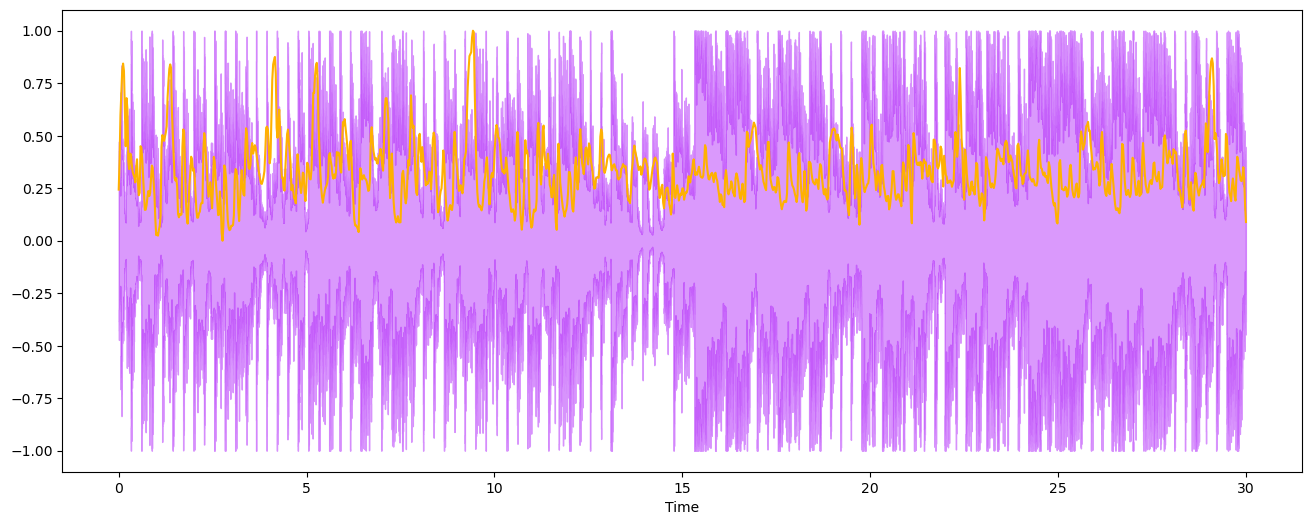

In [19]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

Chromogram shape: (12, 14)


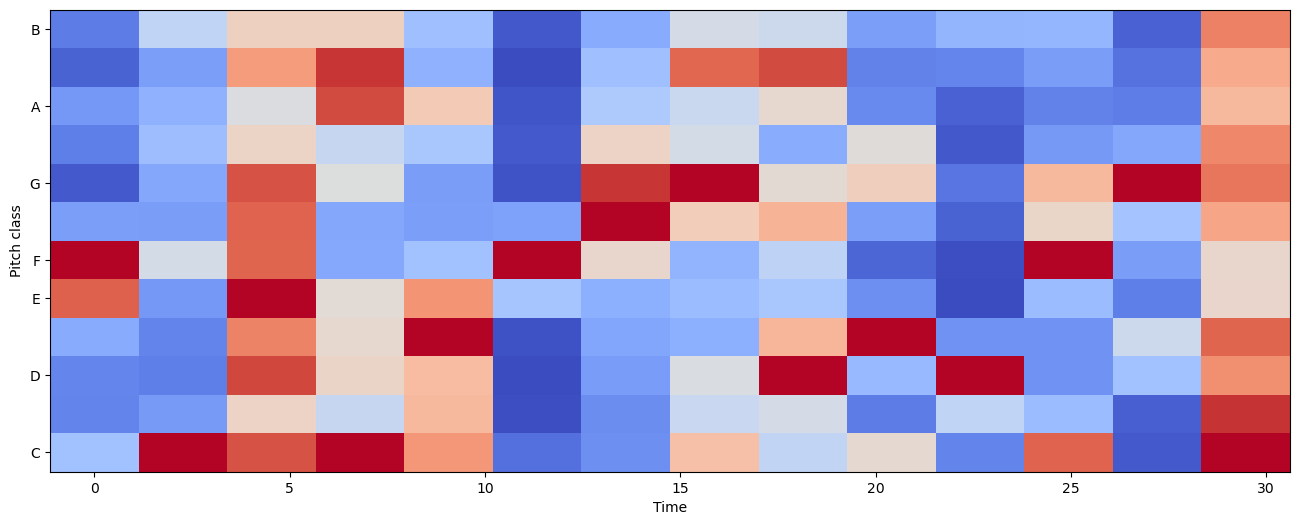

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 50000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## Principal Componenet Analysis


In [21]:
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

In [22]:
from sklearn import preprocessing

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

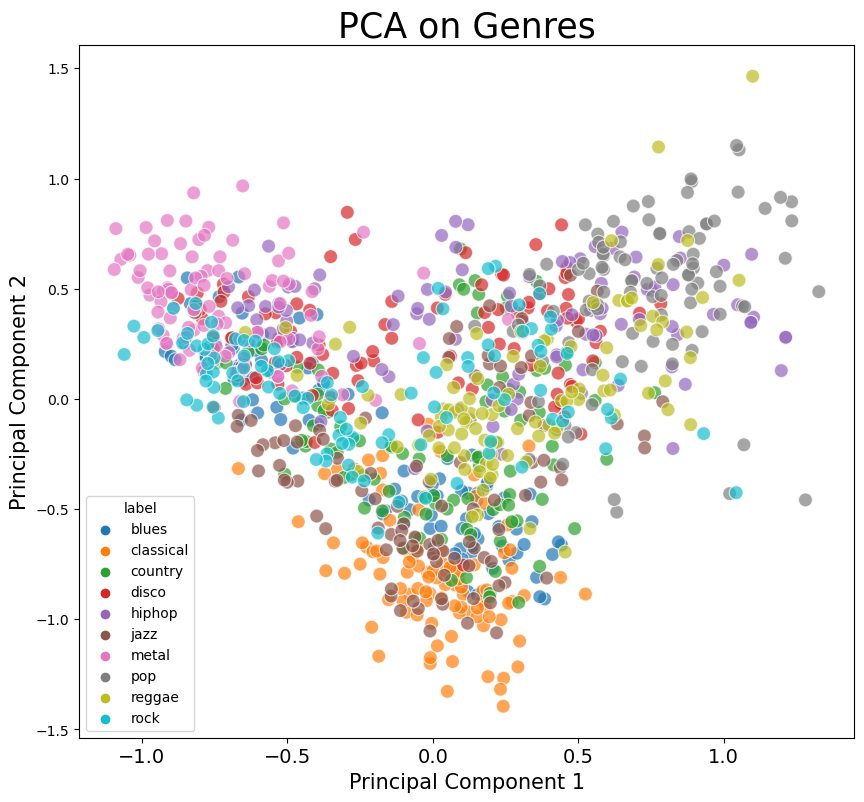

In [24]:
plt.figure(figsize = (10, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Modelling

In [25]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [27]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

## Preprocessing and data preparation

In [28]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [29]:
# creating train test validation split as 70,15,15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [30]:
def model_assess(model, title = "Default"):
    '''
    to fit and evaluate our models

    :input:
     model : model to be evaluated
     title : title of the plots
    '''
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print("F1 Score: ",f1_score(y_test,preds, average='macro'))
    cm = confusion_matrix(y_test, preds)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

## Stochastic Gradient Descent

In [31]:
sgd = SGDClassifier(max_iter=50000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

F1 Score:  0.6363855743490251
Accuracy Stochastic Gradient Descent : 0.66088 



## MLP Classifier

In [32]:
nn = MLPClassifier(solver='adam', alpha=1e-5, activation='relu', hidden_layer_sizes=(1000, 100), random_state=1)
model_assess(nn, "Neural Nets")

F1 Score:  0.8573207874953445
Accuracy Neural Nets : 0.85848 



## Support Vector Machine

In [33]:
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

F1 Score:  0.7581005450841262
Accuracy Support Vector Machine : 0.76235 



## Random Forest

In [34]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

F1 Score:  0.8110371833042812
Accuracy Random Forest : 0.81442 



## Light Gradient Boosting Machine

In [35]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# Initialize the classifier
clf = LGBMClassifier(
    num_leaves=30,
    max_depth=10,
    learning_rate=0.01,
    n_estimators=10000,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Fit the model with callbacks
clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='logloss',  # Example metric
    callbacks=[
        early_stopping(stopping_rounds=500),  # Early stopping
        log_evaluation(period=100)  # Log progress every 100 rounds
    ]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14328
[LightGBM] [Info] Number of data points in the train set: 6993, number of used features: 57
[LightGBM] [Info] Start training from score -2.329103
[LightGBM] [Info] Start training from score -2.315973
[LightGBM] [Info] Start training from score -2.285992
[LightGBM] [Info] Start training from score -2.304446
[LightGBM] [Info] Start training from score -2.320331
[LightGBM] [Info] Start training from score -2.281782
[LightGBM] [Info] Start training from score -2.305880
[LightGBM] [Info] Start training from score -2.255519
[LightGBM] [Info] Start training from score -2.324707
[LightGBM] [Info] Start training from score -2.304446
Training until validation scores don't improve for 500 rounds
[100]	training's multi_logloss: 0.739718	vali

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=10000,
               num_leaves=30, random_state=42, reg_alpha=0.1, reg_lambda=0.1)

In [36]:
fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()
fold_importance_df['feature'] = X_train.columns
fold_importance_df['importance'] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df,fold_importance_df], axis=0)

Text(0.5, 1.0, 'LGBM Features (avg over folds)')

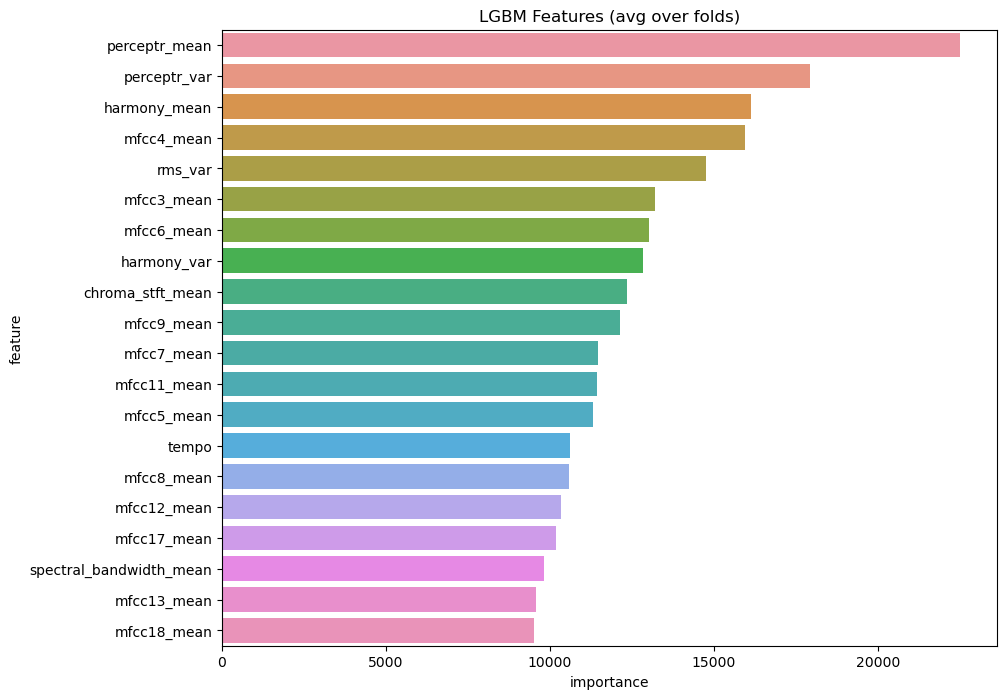

In [37]:
## plotting feature importance matrix
cols = feature_importance_df[['feature','importance']].groupby('feature').mean().sort_values(by = "importance", ascending=False)[:20].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(10,8))
sns.barplot(x='importance',y = 'feature', data=best_features.sort_values(by="importance", ascending=False))
plt.title("LGBM Features (avg over folds)")

In [38]:
y_pred_lgbm = clf.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_pred_lgbm))

0.9032042723631508


In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_lgbm, average='macro')

0.9025948740142328

## Deep Neural Network using Keras

In [41]:
# encoding target variables as they are categories
label_as_binary = LabelBinarizer()
y = label_as_binary.fit_transform(y)

In [42]:
# creating train test validation split as 70,15,15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [43]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
# tf.random.set_seed(seed)

TF version:- 2.17.0


In [44]:
def trainModel(model, epochs, optimizer):
    '''
    compiles and fits the model on the train data

    :params:
     model : built model
     epochs : number of epochs
     optimizer : optimizer to be used

    :returns:
     model fit on the given dataset
    '''
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

def plotHistory(history):
    '''
    plots errors
    '''
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [50]:
def trainModel(model, epochs, optimizer):
    '''
    Compiles and fits the model on the train data.

    Parameters:
    - model: Sequential model
    - epochs: Number of epochs to train
    - optimizer: Optimizer to use (e.g., 'adam', 'rmsprop')

    Returns:
    - Model history after fitting
    '''
    batch_size = 128
    
    # Compile the model with metrics specified here
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']  # Specify metrics here
    )
    
    # Train the model
    return model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size
    )


In [51]:
model_4_history = trainModel(model=model_4, epochs=50, optimizer='rmsprop')


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1459 - loss: 2.2535 - val_accuracy: 0.3649 - val_loss: 1.7514
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3314 - loss: 1.8370 - val_accuracy: 0.4049 - val_loss: 1.6482
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3843 - loss: 1.6338 - val_accuracy: 0.4363 - val_loss: 1.4379
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4338 - loss: 1.5307 - val_accuracy: 0.4450 - val_loss: 1.4108
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4572 - loss: 1.4638 - val_accuracy: 0.5590 - val_loss: 1.2538
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5107 - loss: 1.3619 - val_accuracy: 0.5544 - val_loss: 1.1995
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5219 - loss: 1.3294 - val_accuracy: 0.5023 - val_loss: 1.3052
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5379 - loss: 1.2827 - val_accuracy: 0.5797 - v

## Convolutional Neural Network

### Generating dataset
Creates train and validation sets from the data available in folder path provided. Each subfolder is regarded as 1 category or class

In [52]:
import tensorflow as tf

# Define the path where the data is stored
base_path = "F:/Projects/SET 2 - Music/Data/spectogram"
image_size = (180, 180)  # Adjust the image size as needed
batch_size = 32

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,  # Split 20% for validation
    subset="training",  # Subset for training data
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,  # Split 20% for validation
    subset="validation",  # Subset for validation data
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

# Preview the dataset (Optional)
print(f"Training dataset size: {len(train_ds)} batches")
print(f"Validation dataset size: {len(val_ds)} batches")

# Display the class names
print("Class names (genres):", train_ds.class_names)


Found 554 files belonging to 10 classes.
Using 444 files for training.
Found 554 files belonging to 10 classes.
Using 110 files for validation.
Training dataset size: 14 batches
Validation dataset size: 4 batches
Class names (genres): ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [53]:
# Augmenting the data to create more variations and help build a more robust model
data_augmentation = keras.Sequential(
    [
        # randomly flips horizontally
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

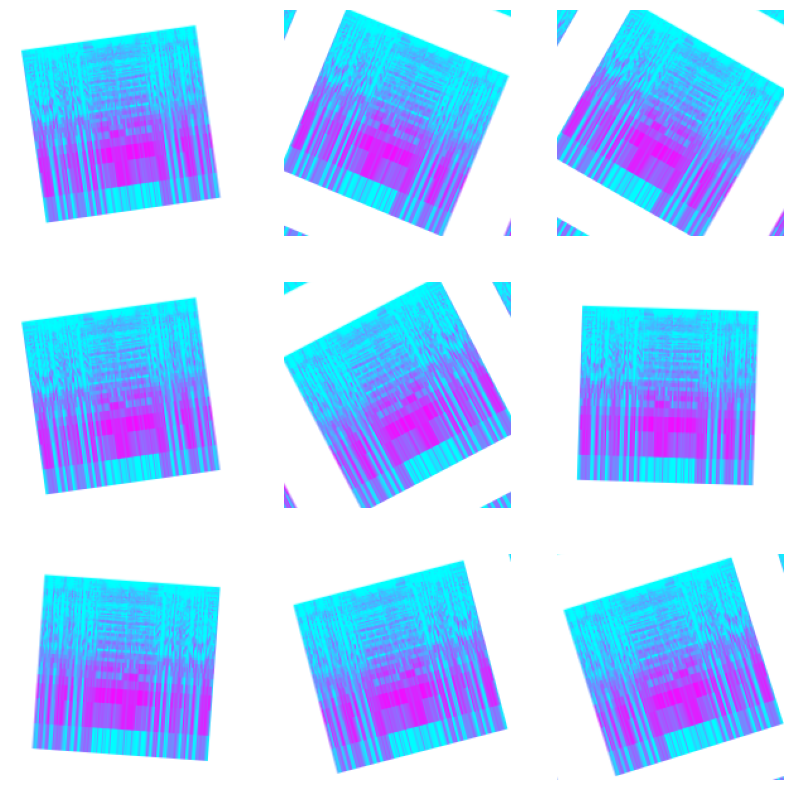

In [54]:
# Example of augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [55]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [56]:
# buffered prefetching so data can be yielded from disk without having I/O becoming blocking:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

### Training our CNN model
Sparse categorical entropy is used as labels as encoded into integer variables

In [57]:
import tensorflow as tf
from tensorflow import keras

# Define the model (replace this with your actual model architecture)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

# Define the training settings
epochs = 12

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model with the dataset
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)



Epoch 1/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1770 - loss: 10868.8730 - val_accuracy: 0.1818 - val_loss: 1293.0201
Epoch 2/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 945ms/step - accuracy: 0.1718 - loss: 1018.3300 - val_accuracy: 0.1909 - val_loss: 147.7841
Epoch 3/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1623 - loss: 86.9616 - val_accuracy: 0.2000 - val_loss: 3.6093
Epoch 4/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 860ms/step - accuracy: 0.2045 - loss: 6.8713 - val_accuracy: 0.1727 - val_loss: 2.2929
Epoch 5/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 905ms/step - accuracy: 0.1859 - loss: 3.4282 - val_accuracy: 0.1727 - val_loss: 2.2872
Epoch 6/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 821ms/step - accuracy: 0.1835 - loss: 2.2842 - val_accuracy: 0.1727 - val_loss: 2.2811
Epoch 7/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 864ms/step - accuracy: 0.1863 - loss: 2.2773 - val_accuracy: 0.1727 - val_loss: 2.2749
Epoch 8/12
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 837ms/step - accuracy: 0.1629 - loss: 2.2715 - v

# Recommendations

### Nearest Neighbors

In [58]:
from sklearn.neighbors import NearestNeighbors
import IPython.display as ipd

In [59]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')

In [60]:
data

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


In [61]:
knn = NearestNeighbors(n_neighbors=10, radius=0.1, algorithm='brute')
knn.fit(data[data.columns[2:-1]],data['label'])

NearestNeighbors(algorithm='brute', n_neighbors=10, radius=0.1)

In [62]:
def get_playlist(filename, nn):
  '''
  generates playlist similar to the specified song

  :params:
   filename : name of the file to start generating playlist
   nn       : nearest neighbours

  :returns:
   idx : names of the songs from the original dataframe
  '''
  song = data[data['filename'] == filename]
  neighbour = nn.kneighbors(song[song.columns[2:-1]], return_distance=True)
  idx = []
  for item in neighbour[1][0]:
    idx.append(filenames[item])
  return idx

In [63]:
playlist = get_playlist('pop.00019.wav', knn)
print('Playlist:', playlist)
ipd.Audio(f'{general_path}/genres_original/'+playlist[2])

Playlist: ['pop/pop.00019.wav', 'hiphop/hiphop.00067.wav', 'pop/pop.00068.wav', 'reggae/reggae.00064.wav', 'country/country.00020.wav', 'pop/pop.00043.wav', 'hiphop/hiphop.00027.wav', 'hiphop/hiphop.00063.wav', 'blues/blues.00005.wav', 'hiphop/hiphop.00009.wav']


### Cosine Similarity